In [1]:
! pip install matplotlib

In [3]:
! pip install scikit-learn


In [4]:
! pip install emoji

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!pip install tensorflow==2.7 


  Using cached tensorflow-2.7.0-cp38-cp38-manylinux2010_x86_64.whl (489.6 MB)


In [8]:

import tensorflow as tf
tf.__version__

'2.7.0'

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
import emoji


In [13]:
df1=pd.read_csv('/mnt/azureml/cr/j/ec6c81310066482c9f2fcc2c79063234/exe/wd/TopLabeledTrain50V3.csv')


In [14]:
df1.shape


(495920, 3)

In [15]:
df1.head()


,Unnamed: 0,label,sentence
0,0,0,sam is late to school all the time how this bi...
1,1,1,i would love to be a fly on the wall for trump...
2,2,2,nexus p
3,3,3,well that too
4,4,4,ive been waiting since march


In [16]:
df1['label'].value_counts()


label
4     83854
5     28593
15    21714
2     21305
27    20077
9     17854
8     17684
0     16270
26    13353
11    12473
30    11952
33    11341
13    10910
39     9692
31     9626
6      9529
12     8586
3      7758
24     7367
16     6967
34     6742
17     6424
20     6404
25     6247
49     6230
23     6168
28     5693
29     5414
35     5361
43     5162
40     5154
36     5020
41     4918
1      4917
37     4867
7      4834
19     4718
44     4694
32     4450
14     4429
22     4424
47     4398
38     4294
48     4228
42     4198
18     4195
21     4041
45     4003
46     3732
10     3656
Name: count, dtype: int64

In [17]:
train_df = df1 

In [18]:
test_df=pd.read_csv('/mnt/azureml/cr/j/ec6c81310066482c9f2fcc2c79063234/exe/wd/TopLabeledTest50V3.csv')


In [19]:
test_df.head()


,Unnamed: 0,label,sentence
0,0,0,for my sake she can tweet whatever she feels l...
1,1,37,learn how reversals are like forks in the road...
2,2,4,the ny times just posted the most crucial arti...
3,3,9,hey guys someone is leaking oras on twitch
4,4,25,my emotions are all over the place i can't sle...


In [20]:
x_train=train_df['sentence']


In [21]:
x_test=test_df['sentence']


In [22]:
y_train=train_df['label']


In [23]:
y_train.value_counts()


label
4     83854
5     28593
15    21714
2     21305
27    20077
9     17854
8     17684
0     16270
26    13353
11    12473
30    11952
33    11341
13    10910
39     9692
31     9626
6      9529
12     8586
3      7758
24     7367
16     6967
34     6742
17     6424
20     6404
25     6247
49     6230
23     6168
28     5693
29     5414
35     5361
43     5162
40     5154
36     5020
41     4918
1      4917
37     4867
7      4834
19     4718
44     4694
32     4450
14     4429
22     4424
47     4398
38     4294
48     4228
42     4198
18     4195
21     4041
45     4003
46     3732
10     3656
Name: count, dtype: int64

In [24]:
y_test=test_df['label']


In [25]:
y_test.value_counts()


label
4     20964
5      7149
15     5429
2      5327
27     5020
9      4464
8      4421
0      4067
26     3338
11     3118
30     2988
33     2835
13     2727
39     2423
31     2407
6      2382
12     2146
3      1939
24     1842
16     1742
34     1685
17     1606
20     1601
25     1562
49     1557
23     1542
28     1423
29     1353
35     1340
43     1290
40     1288
36     1255
41     1230
1      1229
37     1217
7      1209
19     1180
44     1173
32     1112
14     1107
22     1106
47     1100
38     1074
48     1057
18     1049
42     1049
21     1010
45     1001
46      933
10      914
Name: count, dtype: int64

In [26]:
y_train_categorical=ku.to_categorical(y_train,num_classes=50)


In [27]:
y_test_categorical=ku.to_categorical(y_test,num_classes=50)


In [28]:
tokenizer=Tokenizer()


In [29]:
x_train = x_train.astype(str)

In [30]:
x_test = x_test.astype(str)

In [31]:
tokenizer.fit_on_texts(x_train)


In [32]:
word_index=tokenizer.word_index
word_index

{'i': 1,
 'you': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'my': 6,
 'and': 7,
 'it': 8,
 'me': 9,
 'is': 10,
 'for': 11,
 "'s": 12,
 'in': 13,
 'this': 14,
 'so': 15,
 'that': 16,
 'of': 17,
 "'m": 18,
 'on': 19,
 "n't": 20,
 'do': 21,
 'be': 22,
 'just': 23,
 'like': 24,
 'but': 25,
 'have': 26,
 'love': 27,
 'with': 28,
 'was': 29,
 'up': 30,
 'all': 31,
 'your': 32,
 'not': 33,
 'at': 34,
 'we': 35,
 'get': 36,
 'when': 37,
 'are': 38,
 'amp': 39,
 'what': 40,
 'good': 41,
 'he': 42,
 'out': 43,
 'happy': 44,
 'go': 45,
 'know': 46,
 'if': 47,
 'one': 48,
 'they': 49,
 'now': 50,
 'can': 51,
 'no': 52,
 'day': 53,
 'got': 54,
 'too': 55,
 'u': 56,
 '️': 57,
 'about': 58,
 "can't": 59,
 'how': 60,
 "'re": 61,
 'time': 62,
 'she': 63,
 'thank': 64,
 'see': 65,
 'want': 66,
 'really': 67,
 'from': 68,
 'need': 69,
 'why': 70,
 'much': 71,
 'birthday': 72,
 'back': 73,
 'lol': 74,
 'did': 75,
 'will': 76,
 'today': 77,
 'as': 78,
 'her': 79,
 'people': 80,
 "'ll": 81,
 'who': 82,
 'shit': 83,


In [33]:
vocab_size=len(word_index)+1
vocab_size

102449

In [34]:
train_sequence=tokenizer.texts_to_sequences(x_train)
train_padded=pad_sequences(train_sequence,maxlen=10)

In [35]:
test_sequence=tokenizer.texts_to_sequences(x_test)
test_padded=pad_sequences(test_sequence,maxlen=10)

In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

--2023-07-26 17:13:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.202.128, 209.85.203.128, 74.125.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.202.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-26 17:13:45 ERROR 404: Not Found.



In [36]:
embeddings_index = {};
with open('/mnt/azureml/cr/j/ec6c81310066482c9f2fcc2c79063234/exe/wd/glove.6B.50d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size,50));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [37]:
model1=Sequential()


2023-08-15 07:03:34.793503: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 07:03:35.590617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14635 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [38]:
model1.add(Embedding(vocab_size,50,input_length=10,weights=[embeddings_matrix],trainable=False))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(32)))
model1.add(Dense(50,activation='softmax'))

In [39]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 50)            5122450   
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               21248     
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
Total params: 5,146,948
Trainable params: 24,498
Non-trainable params: 5,122,450
_________________________________________________________________


In [40]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [41]:
history=model1.fit(train_padded,y_train_categorical,epochs=30,validation_data=(test_padded,y_test_categorical))


Epoch 1/30


2023-08-15 07:06:45.105468: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8200


15498/15498 [==============================] - 84s 5ms/step - loss: 3.2871 - accuracy: 0.1937 - val_loss: 3.1855 - val_accuracy: 0.2093
Epoch 2/30
15498/15498 [==============================] - 79s 5ms/step - loss: 3.2107 - accuracy: 0.2044 - val_loss: 3.1476 - val_accuracy: 0.2136
Epoch 3/30
15498/15498 [==============================] - 79s 5ms/step - loss: 3.1883 - accuracy: 0.2082 - val_loss: 3.1292 - val_accuracy: 0.2180
Epoch 4/30
15498/15498 [==============================] - 79s 5ms/step - loss: 3.1768 - accuracy: 0.2104 - val_loss: 3.1225 - val_accuracy: 0.2191
Epoch 5/30
15498/15498 [==============================] - 78s 5ms/step - loss: 3.1707 - accuracy: 0.2114 - val_loss: 3.1157 - val_accuracy: 0.2210
Epoch 6/30
15498/15498 [==============================] - 78s 5ms/step - loss: 3.1645 - accuracy: 0.2125 - val_loss: 3.1137 - val_accuracy: 0.2217
Epoch 7/30
15498/15498 [==============================] - 78s 5ms/step - loss: 3.1608 - accuracy: 0.2130 - val_loss: 3.1102 - val

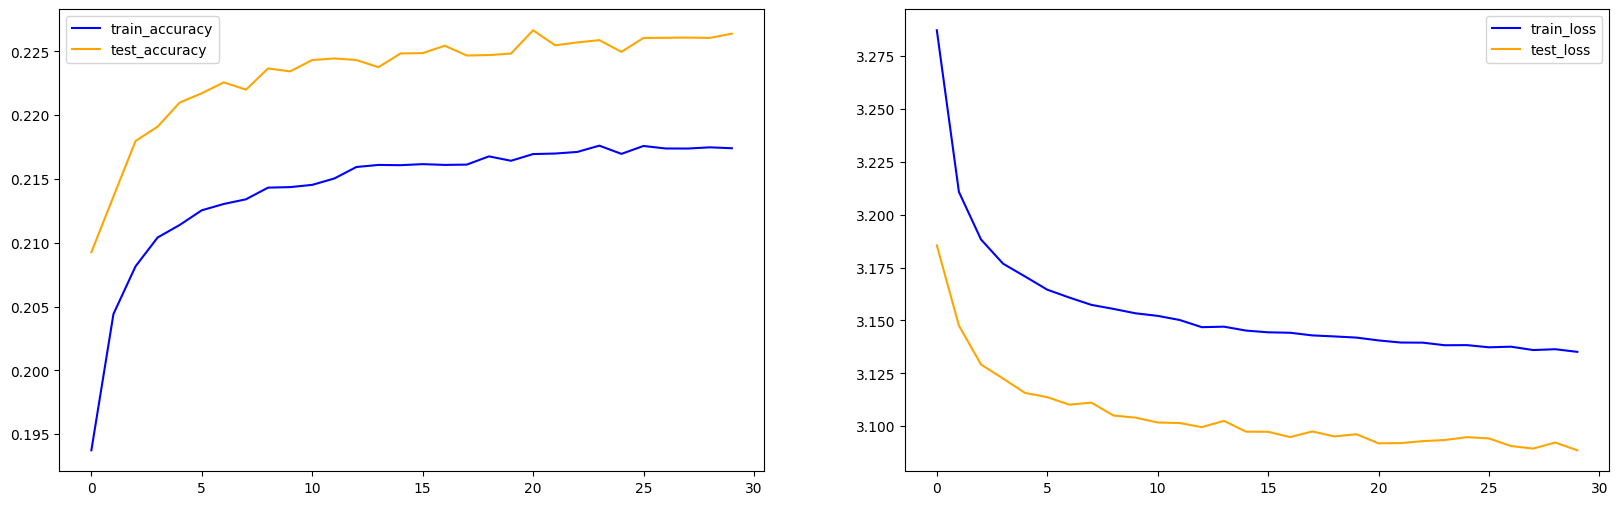

In [42]:
import matplotlib.pyplot as plt

# Assuming you have 'history' object with appropriate data
# Replace this with your actual history object

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Train lines in blue
ax1.plot(history.history['accuracy'], label='train_accuracy', color='blue')
ax2.plot(history.history['loss'], label='train_loss', color='blue')

# Test lines in orange
ax1.plot(history.history['val_accuracy'], label='test_accuracy', color='orange')
ax2.plot(history.history['val_loss'], label='test_loss', color='orange')

ax1.legend()
ax2.legend()

plt.show()


In [68]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Get the predicted labels for the test set
y_pred = model1.predict(test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1_macro = f1_score(y_test_classes, y_pred_classes, average='macro')
f1_weighted = f1_score(y_test_classes, y_pred_classes, average='weighted')

print('Accuracy:', accuracy)
print('top 1 macro F1 score:', f1_macro)
print('top 1 weighted F1 score:', f1_weighted)

Accuracy: 0.2263832876270366
top 1 macro F1 score: 0.0994597253739307
top 1 weighted F1 score: 0.1479311391454694


In [39]:
import numpy as np

# Get the model summary to see the number of parameters
model1.summary()

# Get the model weights and calculate the size in megabytes
weights = model1.get_weights()
size_bytes = sum(np.array([w.size * w.itemsize for w in weights]))
size_megabytes = size_bytes / (1024 * 1024)

print('Model size:', size_megabytes, 'megabytes')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 50)            13938000  
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               21248     
 l)                                                              
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
Total params: 13,960,548
Trainable params: 22,548
Non-trainable params: 13,938,000
_________________________________________________________________
Model size: 53.25526428222656 megabytes


In [69]:
def top3_acuracy(y_pred , y_test):
    true_labels = []
    predictions = []
    for i in range(len(y_pred)):
        index_of_1 = np.argmax(y_test_categorical[i])
        true_labels.append(index_of_1)
        y_pred_single = y_pred[i]  # Assuming y_pred is your array
        # Get the indices of the top three largest values
        top_indices = np.argsort(y_pred_single)[-3:][::-1]
        if index_of_1 in top_indices:
            predictions.append(index_of_1) 
        else:
            predictions.append(top_indices[0])     
    return accuracy_score(true_labels, predictions)

In [63]:
def macro_top3_f1score(y_pred , y_test):
    true_labels = []
    predictions = []
    for i in range(len(y_pred)):
        index_of_1 = np.argmax(y_test_categorical[i])
        true_labels.append(index_of_1)
        y_pred_single = y_pred[i]  # Assuming y_pred is your array
        # Get the indices of the top three largest values
        top_indices = np.argsort(y_pred_single)[-3:][::-1]
        if index_of_1 in top_indices:
            predictions.append(index_of_1) 
        else:
            predictions.append(top_indices[0])   
    return f1_score(true_labels, predictions, average='macro')    
        


In [65]:
def weighted_top3_f1score(y_pred , y_test):
    true_labels = []
    predictions = []
    for i in range(len(y_pred)):
        index_of_1 = np.argmax(y_test_categorical[i])
        true_labels.append(index_of_1)
        y_pred_single = y_pred[i]  # Assuming y_pred is your array
        # Get the indices of the top three largest values
        top_indices = np.argsort(y_pred_single)[-3:][::-1]
        if index_of_1 in top_indices:
            predictions.append(index_of_1) 
        else:
            predictions.append(top_indices[0])   
    return f1_score(true_labels, predictions, average='weighted')    
        


In [70]:
print(f"The top 3 macro f1 score is {macro_top3_f1score(y_pred , y_test_categorical)}")
print(f"thr top 3 weighted f1 score is {weighted_top3_f1score(y_pred , y_test_categorical)}")
print(f"thr top 3 accuracy f1 score is {top3_acuracy(y_pred , y_test_categorical)}")

The top 3 macro f1 score is 0.23575870732325033
thr top 3 weighted f1 score is 0.3402001646782654
thr top 3 accuracy f1 score is 0.3992740764639458


In [40]:
model2=Sequential()


In [42]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=10, weights=[embeddings_matrix], trainable=False))
model2.add(Dropout(0.5))
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(LSTM(128, return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(20, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 50)            13938000  
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           91648     
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 20)               

In [44]:
import numpy as np

# Get the model summary to see the number of parameters
model2.summary()

# Get the model weights and calculate the size in megabytes
weights = model2.get_weights()
size_bytes = sum(np.array([w.size * w.itemsize for w in weights]))
size_megabytes = size_bytes / (1024 * 1024)

print('Model size:', size_megabytes, 'megabytes')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 50)            13938000  
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           91648     
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 20)               

In [45]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [46]:
history=model1.fit(train_padded,y_train_categorical,epochs=30,validation_data=(test_padded,y_test_categorical))


Epoch 1/30
14189/14189 [==============================] - 68s 5ms/step - loss: 2.2859 - accuracy: 0.3328 - val_loss: 2.2590 - val_accuracy: 0.3399
Epoch 2/30
14189/14189 [==============================] - 65s 5ms/step - loss: 2.2864 - accuracy: 0.3320 - val_loss: 2.2577 - val_accuracy: 0.3416
Epoch 3/30
14189/14189 [==============================] - 65s 5ms/step - loss: 2.2854 - accuracy: 0.3331 - val_loss: 2.2530 - val_accuracy: 0.3421
Epoch 4/30
14189/14189 [==============================] - 64s 5ms/step - loss: 2.2836 - accuracy: 0.3329 - val_loss: 2.2502 - val_accuracy: 0.3427
Epoch 5/30
14189/14189 [==============================] - 64s 5ms/step - loss: 2.2842 - accuracy: 0.3333 - val_loss: 2.2478 - val_accuracy: 0.3429
Epoch 6/30
14189/14189 [==============================] - 64s 5ms/step - loss: 2.2845 - accuracy: 0.3325 - val_loss: 2.2437 - val_accuracy: 0.3451
Epoch 7/30
14189/14189 [==============================] - 64s 5ms/step - loss: 2.2835 - accuracy: 0.3329 - val_loss: 2

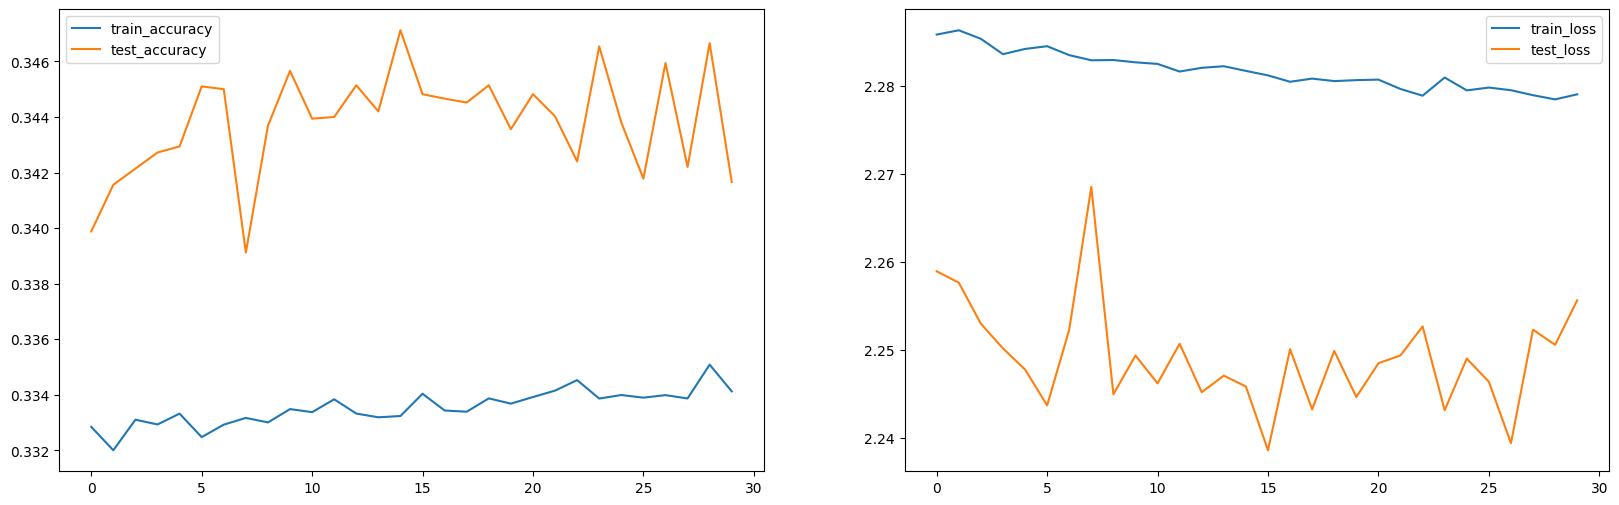

In [47]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
ax1.plot(history.history['accuracy'],label='train_accuracy')
ax1.plot(history.history['val_accuracy'],label='test_accuracy')
ax1.legend()
ax2.plot(history.history['loss'],label='train_loss')
ax2.plot(history.history['val_loss'],label='test_loss')
ax2.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Get the predicted labels for the test set
y_pred = model1.predict(test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print('Accuracy:', accuracy)
print('F1 score:', f1)

Accuracy: 0.34166
F1 score: 0.29497731773353486


In [49]:
model3=Sequential()


In [61]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 50, input_length=10, weights=[embeddings_matrix], trainable=False))
model3.add(Dropout(0.5))
model3.add(LSTM(16, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(32, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(64, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(128, return_sequences=False))
model3.add(Dropout(0.5))
model3.add(Dense(20, activation='softmax'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 50)            13938000  
                                                                 
 dropout_13 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 10, 16)            4288      
                                                                 
 dropout_14 (Dropout)        (None, 10, 16)            0         
                                                                 
 lstm_12 (LSTM)              (None, 10, 32)            6272      
                                                                 
 dropout_15 (Dropout)        (None, 10, 32)            0         
                                                                 
 lstm_13 (LSTM)              (None, 10, 64)           

In [69]:
from keras.layers import Activation, dot, concatenate

model3 = Sequential()
model3.add(Embedding(vocab_size, 50, input_length=10, weights=[embeddings_matrix], trainable=False))
model3.add(Dropout(0.5))
model3.add(LSTM(16, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(32, return_sequences=True))
model3.add(Dropout(0.5))
model3.add(LSTM(64, return_sequences=True))
model3.add(Dropout(0.5))

# Attention layer
attention = dot([model3.layers[-1].output, model3.layers[-1].output], axes=[1,1])
attention = Activation('softmax')(attention)
context = dot([attention, model3.layers[-1].output], axes=[1,2])
context = concatenate([context, model3.layers[-1].output])

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(20, activation='softmax'))

model3.summary()

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 64, 10), (None, 10, 64)]

In [66]:
import numpy as np

# Get the model summary to see the number of parameters
model3.summary()

# Get the model weights and calculate the size in megabytes
weights = model3.get_weights()
size_bytes = sum(np.array([w.size * w.itemsize for w in weights]))
size_megabytes = size_bytes / (1024 * 1024)

print('Model size:', size_megabytes, 'megabytes')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 50)            13938000  
                                                                 
 dropout_18 (Dropout)        (None, 10, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 10, 16)            4288      
                                                                 
 dropout_19 (Dropout)        (None, 10, 16)            0         
                                                                 
 lstm_16 (LSTM)              (None, 10, 32)            6272      
                                                                 
 dropout_20 (Dropout)        (None, 10, 32)            0         
                                                                 
 lstm_17 (LSTM)              (None, 10, 64)           

In [67]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
